In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv(r'train.csv',encoding='gb18030')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [30]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund， Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings， Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen， Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle， Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen， Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran， Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy， Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson， Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson， Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser， Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
# 缺失值处理 age 取均值  Cabin = U
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna('U',inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund， Mr. Owen Harris,male,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,Cumings， Mrs. John Bradley (Florence Briggs Th...,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen， Miss. Laina,female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,Futrelle， Mrs. Jacques Heath (Lily May Peel),female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,Allen， Mr. William Henry,male,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,Moran， Mr. James,male,29.699118,0,0,330877,8.4583,U,Q
6,7,0,1,McCarthy， Mr. Timothy J,male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson， Master. Gosta Leonard,male,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,Johnson， Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,Nasser， Mrs. Nicholas (Adele Achem),female,14.000000,1,0,237736,30.0708,U,C


In [38]:
data['Sex_num'] = data['Sex'].map({"female": 1,'male':2})
data['Embarked_num'] = data['Embarked'].map({'C':1,'Q':2,'S':3})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
0,1,0,3,Braund， Mr. Owen Harris,male,22.000000,1,0,A/5 21171,7.2500,U,S,2,3.0
1,2,1,1,Cumings， Mrs. John Bradley (Florence Briggs Th...,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1.0
2,3,1,3,Heikkinen， Miss. Laina,female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S,1,3.0
3,4,1,1,Futrelle， Mrs. Jacques Heath (Lily May Peel),female,35.000000,1,0,113803,53.1000,C123,S,1,3.0
4,5,0,3,Allen， Mr. William Henry,male,35.000000,0,0,373450,8.0500,U,S,2,3.0
5,6,0,3,Moran， Mr. James,male,29.699118,0,0,330877,8.4583,U,Q,2,2.0
6,7,0,1,McCarthy， Mr. Timothy J,male,54.000000,0,0,17463,51.8625,E46,S,2,3.0
7,8,0,3,Palsson， Master. Gosta Leonard,male,2.000000,3,1,349909,21.0750,U,S,2,3.0
8,9,1,3,Johnson， Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.000000,0,2,347742,11.1333,U,S,1,3.0
9,10,1,2,Nasser， Mrs. Nicholas (Adele Achem),female,14.000000,1,0,237736,30.0708,U,C,1,1.0


In [66]:
# data['Cabin_num'] = data['Cabin'].where( data['Cabin'].isin(['U']),1)
def get_Cabin_num(x):
    if 'A' in x:
        return 1
    elif 'B' in x:
        return 2
    elif 'C' in x:
        return 3
    elif 'D' in x:
        return 4
    elif 'E' in x:
        return 5
    elif 'F' in x:
        return 6
    elif 'G' in x:
        return 7
    elif 'T' in x:
        return 8
    else:
        return 0
#data['Cabin'].where(~data['Cabin'].isin(['T']),8)
data['Cabin_num']= data['Cabin'].apply(get_Cabin_num)
# data['Cabin_num']
data['Cabin_num']

0      0
1      3
2      0
3      3
4      0
5      0
6      5
7      0
8      0
9      0
10     7
11     3
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     4
22     0
23     1
24     0
25     0
26     0
27     3
28     0
29     0
      ..
861    0
862    4
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    4
872    2
873    0
874    0
875    0
876    0
877    0
878    0
879    3
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    2
888    0
889    3
890    0
Name: Cabin_num, Length: 891, dtype: int64

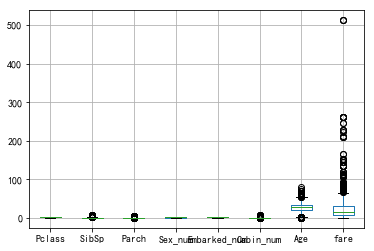

In [69]:
plt.rcParams['font.sans-serif'] = ['SimHei']
df = pd.DataFrame({'Pclass':data['Pclass'],
                     'SibSp':data['SibSp'],
                     'Parch':data['Parch'],
                     'Sex_num':data['Sex_num'],
                     'Embarked_num':data['Embarked_num'],
                     'Cabin_num':data['Cabin_num'],
                     'Age':data['Age'],
                     'fare':data['Fare']})
df.boxplot()

In [76]:
def get_title(x):
    if 'Col' in x:
        return 1
    elif 'Don' in x:
        return 2
    elif 'Dr' in x:
        return 3
    elif 'Jonkheer' in x:
        return 4
    elif 'Lady' in x:
        return 5
    elif 'Major' in x:
        return 6
    elif 'Master' in x:
        return 7
    elif 'Miss' in x:
        return 8
    elif 'Mlle' in x:
        return 9
    elif 'Mme' in x:
        return 10
    elif 'Mr.' in x:
        return 11
    elif 'Mrs.' in x:
        return 12
    elif 'Ms' in x:
        return 13
    elif 'Rev' in x:
        return 14
    elif 'Sir' in x:
        return 15
    elif 'the Countess' in x:
        return 16
    else:
        return 0
    

In [77]:
df['size'] = data['SibSp'] + data['Parch']
df['title'] = data['Name'].apply(get_title)
df['title']

0      11
1      12
2       8
3      12
4      11
5      11
6      11
7       7
8      12
9      12
10      8
11      8
12     11
13     11
14      8
15     12
16      7
17     11
18     12
19     12
20     11
21     11
22      8
23     11
24      8
25     12
26     11
27     11
28      8
29     11
       ..
861    11
862    12
863     8
864    11
865    12
866     8
867    11
868    11
869     7
870    11
871    12
872    11
873    11
874    12
875     8
876    11
877    11
878    11
879    12
880    12
881    11
882     8
883    11
884    11
885    12
886    14
887     8
888     8
889    11
890    11
Name: title, Length: 891, dtype: int64

In [78]:
# 归一化
df_norm = (df-df.min())/(df.max()-df.min())
df_norm


,Pclass,SibSp,Parch,Sex_num,Embarked_num,Cabin_num,Age,fare,size,title
0,1.0,0.125,0.000000,1.0,1.0,0.000,0.271174,0.014151,0.1,0.6875
1,0.0,0.125,0.000000,0.0,0.0,0.375,0.472229,0.139136,0.1,0.7500
2,1.0,0.000,0.000000,0.0,1.0,0.000,0.321438,0.015469,0.0,0.5000
3,0.0,0.125,0.000000,0.0,1.0,0.375,0.434531,0.103644,0.1,0.7500
4,1.0,0.000,0.000000,1.0,1.0,0.000,0.434531,0.015713,0.0,0.6875
5,1.0,0.000,0.000000,1.0,0.5,0.000,0.367921,0.016510,0.0,0.6875
6,0.0,0.000,0.000000,1.0,1.0,0.625,0.673285,0.101229,0.0,0.6875
7,1.0,0.375,0.166667,1.0,1.0,0.000,0.019854,0.041136,0.4,0.4375
8,1.0,0.000,0.333333,0.0,1.0,0.000,0.334004,0.021731,0.2,0.7500
9,0.5,0.125,0.000000,0.0,0.0,0.000,0.170646,0.058694,0.1,0.7500


In [88]:
data['Ticket'].nunique()
df['Party'] = pd.DataFrame(data['Ticket'],data['Ticket'].value_counts())

ValueError: cannot reindex from a duplicate axis